# Proyek Analisis Data: [Bike-sharing-dataset.zip]
- **Nama:** [Deswa Ramadhani Naufal Hidayat]
- **Email:** [didan.keyen@gmail.com]
- **ID Dicoding:** [deswarnh]

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dari musim yang berbeda di tahun 2011 dan 2012
- Bagaimana performa penjualan rata-rata dari perbedaan waktu antara:pagi,siang,sore,malam

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling


### Gathering Data

In [2]:
bikeday_df = pd.read_csv("day.csv")
bikeday_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
bikehour_df = pd.read_csv("hour.csv")
bikehour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- variabel bikeday_df dibaca dari file day.csv
- variabel bikehour_df dibaca dari file hour.csv
- menampilkan preview data

### Assessing Data

In [4]:
bikeday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
bikeday_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
bikeday_df.duplicated().sum()

0

In [7]:
bikeday_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
bikehour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
bikehour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
bikehour_df.duplicated().sum()

0

In [11]:
bikehour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- bikeday_df dan bikehour_df tidak memiliki missing file, duplikat, dan inaccurate value
- kesalahan tipe data pada dteday seharusnya datetime

### Cleaning Data

In [12]:
bikeday_datetime_column = ["dteday"]

for column in bikeday_datetime_column:
  bikeday_df[column] = pd.to_datetime(bikeday_df[column])

In [13]:
bikeday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
bikehour_datetime_column = ["dteday"]

for column in bikehour_datetime_column:
  bikehour_df[column] = pd.to_datetime(bikehour_df[column])

In [15]:
bikehour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- berhasil mengubah tipe data pada dteday ke datetime pada variabel
  bikeday_df dan bikehour_df

## Exploratory Data Analysis (EDA)

### Explore Data bikeday_df

In [16]:
bikeday_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [17]:
bikeday_df["yr_deskripsi"] = bikeday_df["yr"].map({
    0 : "2011",
    1 : "2012",
})
bikeday_df["season_deskripsi"] = bikeday_df["season"].map({
    1 : "springer",
    2 : "summer",
    3 : "fall",
    4 : "winter"
})


In [18]:
bikeday_df.groupby(by=["season_deskripsi"]).agg({
    'cnt': ['sum', "max", "min", "mean", "std"],

})

cnt                                      
                      sum   max   min         mean          std
season_deskripsi                                               
fall              1061129  8714  1115  5644.303191  1459.800381
springer           471348  7836   431  2604.132597  1399.942119
summer             918589  8362   795  4992.331522  1695.977235
winter             841613  8555    22  4728.162921  1699.615261

In [19]:
bikeday_df.groupby(by=["yr_deskripsi"]).agg({
    'cnt': ['sum', "max", "min", "mean", "std"],

})

cnt                                     
                  sum   max  min         mean          std
yr_deskripsi                                              
2011          1243103  6043  431  3405.761644  1378.753666
2012          2049576  8714   22  5599.934426  1788.667868

In [31]:
tabel = bikeday_df.groupby(["season_deskripsi", "yr_deskripsi"], as_index=False)["cnt"].sum()
bikeday_df.groupby(by=["season_deskripsi","yr_deskripsi"]).cnt.sum().sort_values(ascending=False)

season_deskripsi  yr_deskripsi
fall              2012            641479
summer            2012            571273
winter            2012            515476
fall              2011            419650
summer            2011            347316
winter            2011            326137
springer          2012            321348
                  2011            150000
Name: cnt, dtype: int64

**Insight:**
- mengubah value pada yr dan season agar lebih mudah dipahami
- tahun penjualan terbanyak adalah tahun 2012
- musim penjualan terbanyak adalah musim fall
- jika diurutkan, penjualan tertinggi berada di musim fall tahun 2012

### Explore Data bikehour_df

In [21]:
bikehour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [22]:
bikehour_df["kategorijam"] = bikehour_df.hr.apply(lambda x: "pagi" if 5 <= x <= 10 else ("siang" if 11 <= x <= 15 else ("sore" if 16 <= x <= 18 else "malam")))
tabel = bikehour_df.groupby(by="kategorijam")["cnt"].mean().sort_values(ascending=False)
bikehour_df.groupby(by="kategorijam")["cnt"].mean().sort_values(ascending=False)

,cnt
kategorijam,
sore,399.625229
siang,241.475563
pagi,177.071264
malam,106.762745


**Insight:**
- pada file ini terdapat kolom hour untuk mengelompokkan waktu yaitu
    pagi(5-10)
    siang (11-15)
    sore (16-18)
    malam (19-4)
- penjualan rata-rata terbanyak adalah pada sore hari

## Visualization & Explanatory Analysis

### Pertanyaan 1:

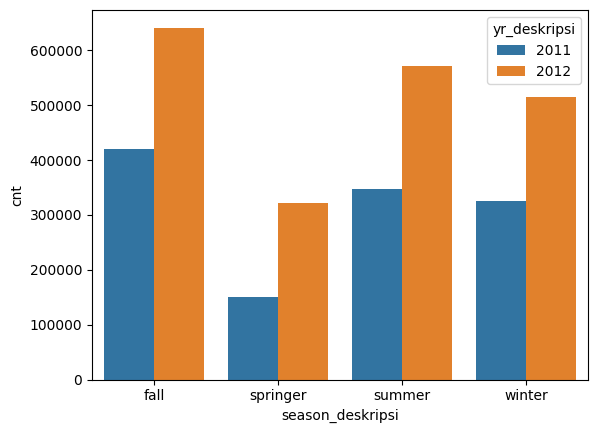

In [32]:
sns.barplot(data=tabel, x="season_deskripsi", y="cnt", hue="yr_deskripsi", errorbar=None)
plt.show()

### Pertanyaan 2:

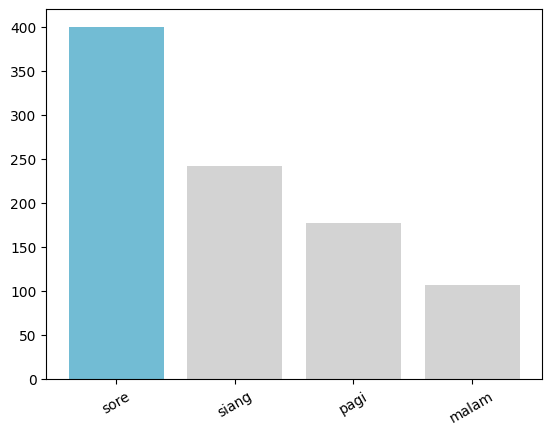

In [26]:
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.bar(x=tabel.index, height=tabel.values, color=colors_)
plt.xticks(rotation=30)
plt.show()

**Insight:**
- Penjualan tertinggi pada fall 2012 dan penjualan terendah pada springer 2011
- Penjualan tertinggi pada sore hari

In [36]:
all_df = pd.merge(
    left = bikeday_df,
    right = bikehour_df,
    how="left",
    left_on = "dteday",
    right_on = "dteday"
)
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,kategorijam
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.81,0.0,3,13,16,malam
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.22,0.2727,0.80,0.0,8,32,40,malam
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.22,0.2727,0.80,0.0,5,27,32,malam
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.75,0.0,3,10,13,malam
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.75,0.0,0,1,1,malam


In [37]:
all_df.to_csv("main_data.csv", index=False)

## Analisis Lanjutan (Opsional)

## Conclusion

Dari file sumber yaitu day dan hour dibaca lalu dibersihkan datanya, muncul pertanyaan (1) apakah terdapat perbedaan penjualan dari musim ke musim? dan tahun ke tahun? (2) bagaimana performa penjualan rata-rata dari perbedaan waktu antara:pagi,siang,sore,malam?

(1) Pada awalnya variabel season bertipe integer diubah menjadi string agar lebih mudah melihat keterangan musim, kemudian variabel cnt adalah total penjualan dari member & non member, variabel yr untuk tahun diubah dari yang berawal 0 dan 1 menjadi 2011 dan 2012 agar lebih mudah melihat keterangan tahun, dari ketiga variabel tersebut dibuat pivot tabel yang menghasilkan grafik bar chart, Berdasarkan grafik yang ditampilkan pada performa penjualan dari musim yang berbeda di tahun 2011 dan 2012 menunjukkan kenaikan tingkat penjualan di tahun 2012 sebanyak 2049576 dibanding 2011 sebanyak 1243103, kenaikan penjualan di setiap musim di tahun berikutnya, penjualan tertinggi tercapai pada fall 2012 sebanyak 641479 dan penjualan terendah pada springer 2011 sebanyak 150000

(2) Untuk menjawab pertanyaan tersebut, terdapat variabel hr untuk hour dengan nilai 0-23, data kemudian di clustering menurut waktunya yaitu pagi(5-10), siang (11-15), sore (16-18), malam (19-4), kemudian variabel cnt adalah total penjualan dari member & non member, dari dua variabel tersebut dibuat pivot tabel yang menghasilkan grafik bar chart, untuk rata-rata penjualan pada grafik tertinggi dibedakan warnanya agar mencolok, penjualan tertinggi tercapai pada sore hari sebanyak 399.625229 dan penjualan terendah pada malam hari sebanyak 106.762745